# 분류(Classification)



### 이진 분류를 위한 Sigmoid 함수 
- 선형회귀식을 통해 도출한 예측값(z)을 0과 1 사이의 수로 변환해주는 활성화 함수 (Activation Function)

$
    시그모이드(z) = \frac{1}{1 + e^{-z}}
$

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

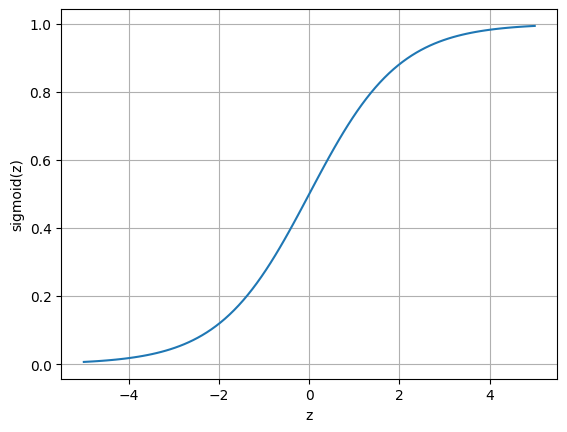

In [19]:
# 시그모이드 시각화 
z = np.linspace(-5, 5, 100)   # (임의의) 선형회귀 결과값
sigmoid_value = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_value)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show()

In [20]:
# 이진분류를 위한 데이터셋 준비 (도미, 빙어)
fish_df = pd.read_csv('./data/fish.csv')
# fish_df['Species'].value_counts()

is_bream_or_smelt = ((fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt'))
fish_df = fish_df[is_bream_or_smelt]
fish_df['Species'].value_counts()    

Species
Bream    35
Smelt    14
Name: count, dtype: int64

In [21]:
# 데이터 분리 및 정규화 (X-y 데이터 분리 / 훈련-평가 데이터 분리 / 정규화)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
# 모델 학습 및 평가 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
print(lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test))

1.0 1.0


In [23]:
y_pred = lr_clf.predict(X_test_scaled[:3])      # 예측
print(y_pred)

print(lr_clf.classes_)                          # 분류 카테고리
print(lr_clf.predict_proba(X_test_scaled[:3]))  # 클래스별 확률 : 주어진 값에 대해 예측 확률을 계산하는 것.  / bream, smelt 에 대한 예측 확률 반환 

['Bream' 'Smelt' 'Smelt']
['Bream' 'Smelt']
[[0.94897272 0.05102728]
 [0.01069927 0.98930073]
 [0.02188743 0.97811257]]


In [24]:
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

print(lr_clf.coef_)
print(lr_clf.intercept_)

# X -> 선형회귀값 계산
# z = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_
z = lr_clf.decision_function(X_test_scaled[:3])
print(z)

# 시그모이드 함수 적용 -> 결과값
sigmoid_value = 1 / (1 + np.exp(-z))
print(sigmoid_value)

# 결과값 -> 최종 분류 결과 
result_arr = ['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid_value]
print(result_arr)

result_arr = [ ]   # 반복문으로 진행(동일)
for value in sigmoid_value :
    if value >= 0.5 : 
        result_arr.append('Smelt')
    else:
        result_arr.append('Bream')
print(result_arr)

[[-0.57717269 -0.79233938 -0.82533982 -0.86579233 -0.82205625]]
[-2.38186126]
[-2.92301974  4.5268231   3.79971238]
[0.05102728 0.98930073 0.97811257]
['Bream', 'Smelt', 'Smelt']
['Bream', 'Smelt', 'Smelt']


**다중 클래스 확률 계산 순서** 
깃확인

In [33]:
# 데이터 셋 생성
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,
    n_features=4,       # 특성 개수
    n_informative=3, 
    n_redundant=0, 
    n_classes=3,        # 하나의 타겟데이터가 가지는 값
    random_state=42
)
# 반환되는 값이 x, y형태로 나옴

In [ ]:
# df.pd.DataFrame(X, columns=['f1', 'f2', 'f3', 'f4'])
# df['target'] = y
# df   # 영상 확인하기

In [34]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [35]:
# 모델 학습 및 평가 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train), lr_clf.score(X_test, y_test)

(0.7066666666666667, 0.44)

In [36]:
# 예측(분류)
lr_clf.predict(X_test[:5])

array([1, 0, 0, 1, 2])

In [ ]:
lr_clf.predict_proba(X_test[:5])    # 분류 기준 확인 

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [38]:
print(lr_clf.coef_)
print(lr_clf.intercept_)

[[ 0.89441441  0.61903765 -0.35254926 -0.16837743]
 [ 0.10632026  0.03401018  0.43335793  0.09398105]
 [-1.00073467 -0.65304782 -0.08080867  0.07439638]]
[ 0.29927161  0.3716549  -0.67092651]


In [40]:
z = lr_clf.decision_function(X_test[:5])
z

array([[-0.34611464,  0.20988442,  0.13623022],
       [ 2.44374453,  0.80123723, -3.24498176],
       [ 0.76663021,  0.19805797, -0.96468818],
       [-0.29622795,  0.86419902, -0.56797107],
       [-1.48600708, -0.51360637,  1.99961345]])

In [45]:
def softmax(z):
    exp_z = np.exp(z)     # e^z     (5, 3) 행렬 형태로 반환
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)    # 열방향 합계 / (5, 1) 형태 반환 = sum 함수의 차원축소로 인해 오류 발행 // keepdims=True를 통해 
    return exp_z / sum_exp_z

# softmax
# e^z / e^z1 + e^z2 + e^z3

y_pred_proba = softmax(z)

In [47]:
import scipy

scipy.special.softmax(z, axis=1)

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [46]:
np.argmax(y_pred_proba, axis=1)

array([1, 0, 0, 1, 2])

In [ ]:
# sum 함수 주의사항


# 차원이 축소됨. 

- 다중 생선 분류

In [ ]:
# 데이터 로드 
fish_df = pd.read_csv('./data/fish.csv')



In [ ]:
# 데이터 분리 및 정규화 (x, y, teat, train)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = 
y = 라벨데이터만



In [51]:
# 모델 훈련 및 평가


In [ ]:
# 모델이 학습한 클래스 출력해보기 
lr_clf.

In [48]:
# 테스트 데이터 5개에 대한 예측 확률 출력해보기


In [ ]:
# 모델의 가중치와 절편을 가져와 z 값을 직접 계산해보기 (decision_function 사용 x)
# softmax 항수 적용 (위에서 만든 softmax() 함수 활용)
